In [ ]:
#93.5 pixel per degree
#20degree =93.5*20=1870 #93.5*5
#2degree image=187

In [8]:
93.5*5

467.5

## no shaking

In [67]:
import os
import cv2
import re

shaking=0
images={}
def parse_filename(filename):
    # Check if 'White' is in the filename
    if 'White' in filename:
        image_type = 'white'
    else:
        image_type = 'airforce'
    # Extract the WG name using regex, assuming it's the first word before 'No Shaking'
    if shaking==0:
        match = re.match(r"(\w+) No Shaking", filename)
    if shaking==1:
        match = re.match(r"(\w+) Shaking", filename)
    if match:
        wg_name = match.group(1)
        return wg_name, image_type
    return None, None
    
if shaking==0:
    folder_path = "/Users/qingjunwang/Downloads/Halibut No Shaking White (1)/no shaking"
if shaking==1:
    folder_path = "/Users/qingjunwang/Downloads/Halibut No Shaking White (1)/shaking"
files = os.listdir(folder_path)
image_files = [f for f in files if f.endswith('.png')]  # Assuming all are PNGs
print(image_files)

for image_file in image_files:
    wg_name, image_type = parse_filename(image_file)
    if wg_name and image_type:
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path)
        if img is not None:
            # Use a tuple (wg_name, image_type) as the key
            images[(wg_name, image_type)] = img
        else:
            print(f"Failed to load image: {image_path}")
    else:
        print(f"Filename does not match expected pattern: {image_file}")

['Walleye No Shaking White.png', 'Halibut No Shaking White.png', 'Phoenix No Shaking airforce.png', 'Phoenix No Shaking White.png', 'Walleye No Shaking airforce.png', 'Halibut No Shaking airforce.png']


In [68]:
images.keys()

dict_keys([('Walleye', 'white'), ('Halibut', 'white'), ('Phoenix', 'airforce'), ('Phoenix', 'white'), ('Walleye', 'airforce'), ('Halibut', 'airforce')])

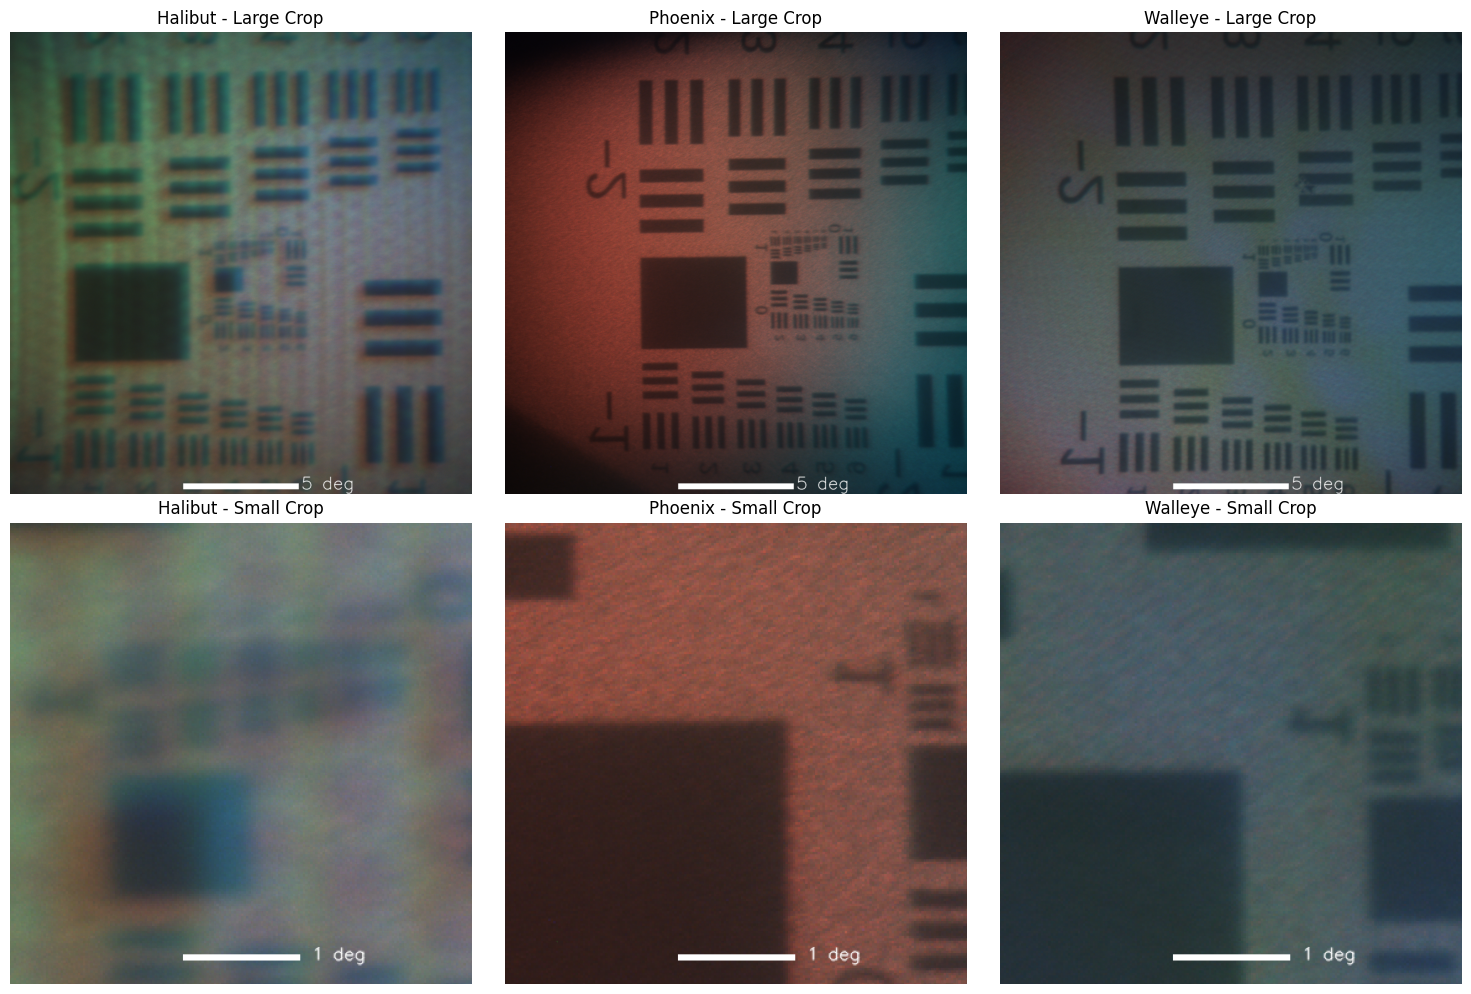

In [69]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def crop_center(img, cropx, cropy):
    y, x = img.shape[:2]
    startx = x // 2 - cropx // 2
    starty = y // 2 - cropy // 2    
    return img[starty:starty+cropy, startx:startx+cropx]

def add_scale_bar(img, pixel_length, label, textsize, bar_height=10, text_offset=10):
    margin = 20  # Margin fropixel_lengthm the bottom edge of the image
    bar_height=pixel_length//20
    start_x = (img.shape[1] - pixel_length) // 2  # Center the scale bar
    start_y = img.shape[0] - bar_height - margin
    # Draw the scale bar
    cv2.rectangle(img, (start_x, start_y), (start_x + pixel_length, start_y + bar_height), (255, 255, 255), -1)
    # Add text label for the scale bar
    font = cv2.FONT_HERSHEY_SIMPLEX
    scale_text_position = (start_x + pixel_length + text_offset, start_y + bar_height)
    cv2.putText(img, label, scale_text_position, font, 0.5*pixel_length/100, (255, 255, 255), textsize, cv2.LINE_AA)
    return img

fig, axs = plt.subplots(2, len(wg_names), figsize=(5 * len(wg_names), 10))
white_images = {k: v for k, v in images.items() if k[1] == 'white'}
airforce_images = {k: v for k, v in images.items() if k[1] == 'airforce'}

white=0
wg_names = sorted(set(k[0] for k in white_images.keys()))
for i, wg in enumerate(wg_names):
    if white==1:
        if (wg, 'white') in white_images:
            img = white_images[(wg, 'white')]
    if white==0:
        if (wg, 'airforce') in airforce_images:
            img = airforce_images[(wg, 'airforce')]

    img_large = crop_center(img, 1870, 1870)
    img_small = crop_center(img, 187*2, 187*2)
    
    img_large_with_bar = add_scale_bar(img_large.copy(), 467, f"5 deg",2)  # Adjust label as needed
    img_small_with_bar = add_scale_bar(img_small.copy(), 47*2, f"1 deg", 1)    # Adjust label as needed
    
    axs[0, i].imshow(cv2.cvtColor(img_large_with_bar, cv2.COLOR_BGR2RGB))
    axs[0, i].set_title(f'{wg} - Large Crop')
    axs[0, i].axis('off')
    
    axs[1, i].imshow(cv2.cvtColor(img_small_with_bar, cv2.COLOR_BGR2RGB))
    axs[1, i].set_title(f'{wg} - Small Crop')
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()

In [12]:
images'Walleye', 'white').shape

(2048, 2448, 3)